In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ffmpeg-python

In [ ]:
!pip install spleeter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install pydub

In [ ]:
from spleeter.separator import Separator
import pandas as pd
import numpy as np
import os, sys
from pydub import AudioSegment, silence
import librosa

### 음원 처리 방식 변경

In [ ]:
import matplotlib.pyplot as plt

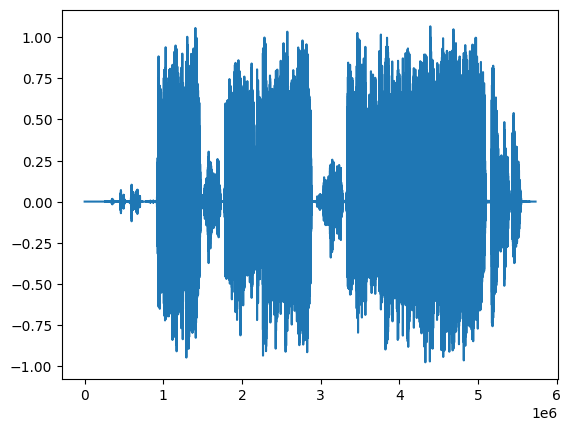

In [ ]:
import librosa
audio, sr = librosa.load(cur_dir+file_name+'_vocals.mp3', sr=22050)
plt.plot(audio)

In [ ]:
term = int(sr/8)
Amplitude_ABS = np.abs(audio)
Amplitude_ABS_mean = []

for t in range(0, len(Amplitude_ABS), term):
    Amplitude_ABS_mean.append(Amplitude_ABS[t:t + term].mean())

Amplitude_Distance = []
for i in range(0, len(Amplitude_ABS_mean) - 1) :
    distance = 1 + ((Amplitude_ABS_mean[i+1] - Amplitude_ABS_mean[i]) ** 2)
    Amplitude_Distance.append(distance ** 0.5)

Amplitude_Distance_array = np.array(Amplitude_Distance)
threshold = Amplitude_Distance_array.mean()
print("Average of Distance1 = ", threshold)

valid_index = []
for i in range(0, len(Amplitude_Distance)) :
    if Amplitude_Distance[i] > threshold :
        valid_index.append(i)

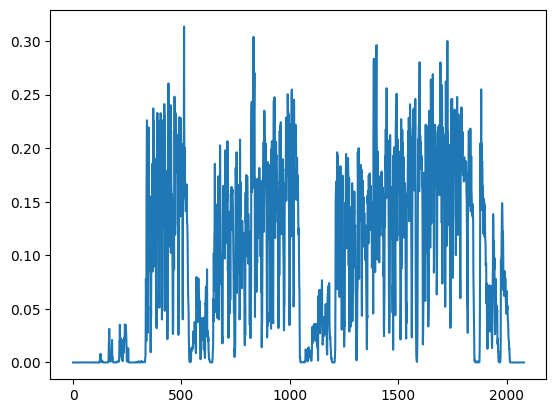

In [ ]:
plt.plot(Amplitude_ABS_mean)

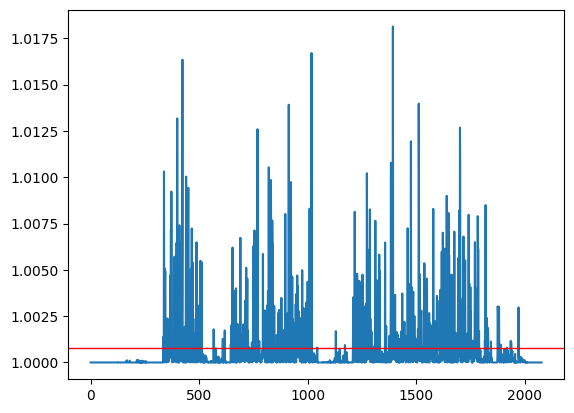

In [ ]:
plt.plot(Amplitude_Distance)
plt.axhline(y=threshold, color='r', linewidth=1)
plt.show()

In [ ]:
startP = valid_index[0] * term
endP = valid_index[len(valid_index) - 1] * term
print("Start Point = ", startP)
print("End Point = ", endP)
print("delay :", startP/22050, "sec")

Start Point =  923260
End Point =  5434832
delay : 41.871201814058956 sec


In [ ]:
int(valid_index[0] * term / 22.05)

41871

In [ ]:
valid_index[3] * term / 22050

42.62113378684807

In [ ]:
startidx = []
endidx = []
startidx.append(valid_index[0] * term / 22.05)
for i in range(len(valid_index)-1):
  dif = (valid_index[i+1] * term / 22.05) - (valid_index[i] * term / 22.05)
  if dif > 2000: # 차이가 2초보다 크면
    endidx.append(valid_index[i] * term / 22.05)
    startidx.append(valid_index[i+1] * term / 22.05)

endidx.append(valid_index[len(valid_index)-1] * term / 22.05)

In [ ]:
startidx

[41871.20181405896,
 70868.57142857142,
 76118.09523809524,
 80742.67573696145,
 99240.9977324263,
 130488.16326530612,
 141237.18820861678,
 146486.7120181406,
 151111.2925170068,
 169609.61451247166,
 227104.3990929705,
 234478.73015873015,
 239728.25396825396,
 241978.0498866213,
 246477.641723356]

In [ ]:
endidx

[63994.19501133787,
 72118.45804988661,
 77242.9931972789,
 97116.19047619047,
 127363.44671201814,
 130488.16326530612,
 141237.18820861678,
 146486.7120181406,
 166484.89795918367,
 223729.7052154195,
 230604.08163265305,
 236228.57142857142,
 239728.25396825396,
 242228.02721088435,
 246477.641723356]

In [ ]:
full_song = mr[0:startidx[0]]

for i in range(len(endidx)):
  tmp_song = voice[startidx[i]:endidx[i]]
  full_song = full_song + tmp_song
  if i != len(startidx)-1:
    tmp_song = mr[endidx[i]:startidx[i+1]]
    full_song = full_song + tmp_song
  else:
    tmp_song = mr[endidx[i]:len(voice)]
    full_song = full_song + tmp_song

In [ ]:
full_song

Output hidden; open in https://colab.research.google.com to view.

### 음원처리 함수

In [ ]:
# voice가 없는 부분에 대한 detection 함수
def indexing(file_link):
  audio, sr = librosa.load(file_link, sr=22050)

  term = int(sr/8)
  Amplitude_ABS = np.abs(audio)
  Amplitude_ABS_mean = []

  for t in range(0, len(Amplitude_ABS), term):
      Amplitude_ABS_mean.append(Amplitude_ABS[t:t + term].mean())

  Amplitude_Distance = []
  for i in range(0, len(Amplitude_ABS_mean) - 1) :
      distance = 1 + ((Amplitude_ABS_mean[i+1] - Amplitude_ABS_mean[i]) ** 2)
      Amplitude_Distance.append(distance ** 0.5)

  Amplitude_Distance_array = np.array(Amplitude_Distance)
  threshold = Amplitude_Distance_array.mean()

  valid_index = []
  for i in range(0, len(Amplitude_Distance)) :
      if Amplitude_Distance[i] > threshold :
          valid_index.append(i)

  startidx = []
  endidx = []
  startidx.append(valid_index[0] * term / 22.05)
  for i in range(len(valid_index)-1):
    dif = (valid_index[i+1] * term / 22.05) - (valid_index[i] * term / 22.05)
    if dif > 2000: # 차이가 2초보다 크면
      endidx.append(valid_index[i] * term / 22.05)
      startidx.append(valid_index[i+1] * term / 22.05)

  endidx.append(valid_index[len(valid_index)-1] * term / 22.05)

  return startidx, endidx

In [ ]:
separator = Separator('spleeter:2stems')

## RnB_Soul

In [ ]:
src = '/content/drive/MyDrive/Hmm2Song/data/song/RnB_Soul'
src_files = os.listdir(src)
files = [x for x in src_files]
files

In [ ]:
cur_dir = src + '/'

In [ ]:
for f in files:
  file_name = f[:-4]
  separator.separate_to_file(f'{cur_dir}{file_name}.mp3', f'{cur_dir}', codec='mp3', filename_format='{filename}_{instrument}.{codec}')
  print(f"{f} --- done")

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Validating archive checksum


INFO:spleeter:Validating archive checksum


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:2stems model file(s) extracted


INFO:spleeter:2stems model file(s) extracted
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
Colocations handled automatically by placer.


000.mp3 --- done
001.mp3 --- done
002.mp3 --- done
003.mp3 --- done
004.mp3 --- done
005.mp3 --- done
006.mp3 --- done
007.mp3 --- done
008.mp3 --- done
009.mp3 --- done
010.mp3 --- done
011.mp3 --- done
012.mp3 --- done
013.mp3 --- done
014.mp3 --- done
015.mp3 --- done
016.mp3 --- done
017.mp3 --- done
018.mp3 --- done
019.mp3 --- done
020.mp3 --- done
021.mp3 --- done
022.mp3 --- done
023.mp3 --- done
024.mp3 --- done
026.mp3 --- done
027.mp3 --- done
028.mp3 --- done
029.mp3 --- done
030.mp3 --- done
031.mp3 --- done
032.mp3 --- done
033.mp3 --- done
034.mp3 --- done
035.mp3 --- done
036.mp3 --- done
038.mp3 --- done
039.mp3 --- done
040.mp3 --- done
041.mp3 --- done
042.mp3 --- done
043.mp3 --- done
044.mp3 --- done
045.mp3 --- done
046.mp3 --- done
047.mp3 --- done
048.mp3 --- done
049.mp3 --- done
050.mp3 --- done
051.mp3 --- done
052.mp3 --- done
053.mp3 --- done
054.mp3 --- done
055.mp3 --- done
056.mp3 --- done
057.mp3 --- done
058.mp3 --- done
059.mp3 --- done
060.mp3 --- do

In [ ]:
out_dir = '/content/drive/MyDrive/Hmm2Song/data/song/Full_input/'

In [ ]:
## 분리된 거 full_song으로 만들어서 Full_input 폴더로!

for f in files:
  file_name = f[:-4]
  startidx, endidx = indexing(cur_dir+file_name+'_vocals.mp3') # 임계값 이상만 인덱싱

  # mr과 voice 불러오기
  voice = AudioSegment.from_file(cur_dir+file_name+'_vocals.mp3')
  mr = AudioSegment.from_file(cur_dir+file_name+'_accompaniment.mp3')

  full_song = mr[0:startidx[0]]

  for i in range(len(startidx)):
    tmp_song = voice[startidx[i]:endidx[i]]
    full_song = full_song + tmp_song
    if i != len(startidx)-1:
      tmp_song = mr[endidx[i]:startidx[i+1]]
      full_song = full_song + tmp_song
    else:
      tmp_song = mr[endidx[i]:len(voice)]
      full_song = full_song + tmp_song

  full_song.export(out_dir+f, format='mp3')
  print(f"{f} --- done")

000.mp3 --- done
001.mp3 --- done
002.mp3 --- done
003.mp3 --- done
004.mp3 --- done
005.mp3 --- done
006.mp3 --- done
007.mp3 --- done
008.mp3 --- done
009.mp3 --- done
010.mp3 --- done
011.mp3 --- done
012.mp3 --- done
013.mp3 --- done
014.mp3 --- done
015.mp3 --- done
016.mp3 --- done
017.mp3 --- done
018.mp3 --- done
019.mp3 --- done
020.mp3 --- done
021.mp3 --- done
022.mp3 --- done
023.mp3 --- done
024.mp3 --- done
026.mp3 --- done
027.mp3 --- done
028.mp3 --- done
029.mp3 --- done
030.mp3 --- done
031.mp3 --- done
032.mp3 --- done
033.mp3 --- done
034.mp3 --- done
035.mp3 --- done
036.mp3 --- done
038.mp3 --- done
039.mp3 --- done
040.mp3 --- done
041.mp3 --- done
042.mp3 --- done
043.mp3 --- done
044.mp3 --- done
045.mp3 --- done
046.mp3 --- done
047.mp3 --- done
048.mp3 --- done
049.mp3 --- done
050.mp3 --- done
051.mp3 --- done
052.mp3 --- done
053.mp3 --- done
054.mp3 --- done
055.mp3 --- done
056.mp3 --- done
057.mp3 --- done
058.mp3 --- done
059.mp3 --- done
060.mp3 --- do

## Indie

In [ ]:
src = '/content/drive/MyDrive/Hmm2Song/data/song/Indie'
src_files = os.listdir(src)
files = [x for x in src_files]
cur_dir = src + '/'

for f in files:
  file_name = f[:-4]
  separator.separate_to_file(f'{cur_dir}{file_name}.mp3', f'{cur_dir}', codec='mp3', filename_format='{filename}_{instrument}.{codec}')
  print(f"{f} --- done")

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Validating archive checksum


INFO:spleeter:Validating archive checksum


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:2stems model file(s) extracted


INFO:spleeter:2stems model file(s) extracted
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
Colocations handled automatically by placer.


104.mp3 --- done
110.mp3 --- done
111.mp3 --- done
119.mp3 --- done
120.mp3 --- done
121.mp3 --- done
125.mp3 --- done
127.mp3 --- done
130.mp3 --- done
134.mp3 --- done
138.mp3 --- done
141.mp3 --- done
142.mp3 --- done
147.mp3 --- done
150.mp3 --- done
153.mp3 --- done
156.mp3 --- done
159.mp3 --- done
161.mp3 --- done
163.mp3 --- done
164.mp3 --- done
167.mp3 --- done
170.mp3 --- done
176.mp3 --- done
181.mp3 --- done
185.mp3 --- done
186.mp3 --- done
188.mp3 --- done


In [ ]:
out_dir = '/content/drive/MyDrive/Hmm2Song/data/song/Full_input/'

## 분리된 거 full_song으로 만들어서 Full_input 폴더로!

for f in files:
  file_name = f[:-4]
  startidx, endidx = indexing(cur_dir+file_name+'_vocals.mp3') # 임계값 이상만 인덱싱

  # mr과 voice 불러오기
  voice = AudioSegment.from_file(cur_dir+file_name+'_vocals.mp3')
  mr = AudioSegment.from_file(cur_dir+file_name+'_accompaniment.mp3')

  full_song = mr[0:startidx[0]]

  for i in range(len(startidx)):
    tmp_song = voice[startidx[i]:endidx[i]]
    full_song = full_song + tmp_song
    if i != len(startidx)-1:
      tmp_song = mr[endidx[i]:startidx[i+1]]
      full_song = full_song + tmp_song
    else:
      tmp_song = mr[endidx[i]:len(voice)]
      full_song = full_song + tmp_song

  full_song.export(out_dir+f, format='mp3')
  print(f"{f} --- done")

104.mp3 --- done
110.mp3 --- done
111.mp3 --- done
119.mp3 --- done
120.mp3 --- done
121.mp3 --- done
125.mp3 --- done
127.mp3 --- done
130.mp3 --- done
134.mp3 --- done
138.mp3 --- done
141.mp3 --- done
142.mp3 --- done
147.mp3 --- done
150.mp3 --- done
153.mp3 --- done
156.mp3 --- done
159.mp3 --- done
161.mp3 --- done
163.mp3 --- done
164.mp3 --- done
167.mp3 --- done
170.mp3 --- done
176.mp3 --- done
181.mp3 --- done
185.mp3 --- done
186.mp3 --- done
188.mp3 --- done


## Folk_Blues

In [ ]:
src = '/content/drive/MyDrive/Hmm2Song/data/song/Folk_Blues'
src_files = os.listdir(src)
files = [x for x in src_files]
cur_dir = src + '/'

for f in files:
  file_name = f[:-4]
  separator.separate_to_file(f'{cur_dir}{file_name}.mp3', f'{cur_dir}', codec='mp3', filename_format='{filename}_{instrument}.{codec}')
  print(f"{f} --- done")

191.mp3 --- done
192.mp3 --- done
193.mp3 --- done
194.mp3 --- done
195.mp3 --- done
196.mp3 --- done
198.mp3 --- done
199.mp3 --- done
200.mp3 --- done
201.mp3 --- done
202.mp3 --- done
203.mp3 --- done
204.mp3 --- done
205.mp3 --- done
206.mp3 --- done
207.mp3 --- done
208.mp3 --- done
209.mp3 --- done
210.mp3 --- done
211.mp3 --- done
212.mp3 --- done
213.mp3 --- done
214.mp3 --- done
215.mp3 --- done
216.mp3 --- done
217.mp3 --- done
218.mp3 --- done
219.mp3 --- done
220.mp3 --- done
221.mp3 --- done
222.mp3 --- done
223.mp3 --- done
224.mp3 --- done
225.mp3 --- done
226.mp3 --- done
227.mp3 --- done
228.mp3 --- done
229.mp3 --- done
230.mp3 --- done
232.mp3 --- done
233.mp3 --- done
235.mp3 --- done
236.mp3 --- done
237.mp3 --- done
238.mp3 --- done
239.mp3 --- done
240.mp3 --- done
241.mp3 --- done
242.mp3 --- done
243.mp3 --- done
244.mp3 --- done
245.mp3 --- done
246.mp3 --- done
247.mp3 --- done
248.mp3 --- done
249.mp3 --- done
250.mp3 --- done
251.mp3 --- done
252.mp3 --- do

In [ ]:
out_dir = '/content/drive/MyDrive/Hmm2Song/data/song/Full_input/'

## 분리된 거 full_song으로 만들어서 Full_input 폴더로!

for f in files:
  file_name = f[:-4]
  startidx, endidx = indexing(cur_dir+file_name+'_vocals.mp3') # 임계값 이상만 인덱싱

  # mr과 voice 불러오기
  voice = AudioSegment.from_file(cur_dir+file_name+'_vocals.mp3')
  mr = AudioSegment.from_file(cur_dir+file_name+'_accompaniment.mp3')

  full_song = mr[0:startidx[0]]

  for i in range(len(startidx)):
    tmp_song = voice[startidx[i]:endidx[i]]
    full_song = full_song + tmp_song
    if i != len(startidx)-1:
      tmp_song = mr[endidx[i]:startidx[i+1]]
      full_song = full_song + tmp_song
    else:
      tmp_song = mr[endidx[i]:len(voice)]
      full_song = full_song + tmp_song

  full_song.export(out_dir+f, format='mp3')
  print(f"{f} --- done")

191.mp3 --- done
192.mp3 --- done
193.mp3 --- done
194.mp3 --- done
195.mp3 --- done
196.mp3 --- done
198.mp3 --- done
199.mp3 --- done
200.mp3 --- done
201.mp3 --- done
202.mp3 --- done
203.mp3 --- done
204.mp3 --- done
205.mp3 --- done
206.mp3 --- done
207.mp3 --- done
208.mp3 --- done
209.mp3 --- done
210.mp3 --- done
211.mp3 --- done
212.mp3 --- done
213.mp3 --- done
214.mp3 --- done
215.mp3 --- done
216.mp3 --- done
217.mp3 --- done
218.mp3 --- done
219.mp3 --- done
220.mp3 --- done
221.mp3 --- done
222.mp3 --- done
223.mp3 --- done
224.mp3 --- done
225.mp3 --- done
226.mp3 --- done
227.mp3 --- done
228.mp3 --- done
229.mp3 --- done
230.mp3 --- done
232.mp3 --- done
233.mp3 --- done
235.mp3 --- done
236.mp3 --- done
237.mp3 --- done
238.mp3 --- done
239.mp3 --- done
240.mp3 --- done
241.mp3 --- done
242.mp3 --- done
243.mp3 --- done
244.mp3 --- done
245.mp3 --- done
246.mp3 --- done
247.mp3 --- done
248.mp3 --- done
249.mp3 --- done
250.mp3 --- done
251.mp3 --- done
252.mp3 --- do

## Rock_Metal

In [ ]:
src = '/content/drive/MyDrive/Hmm2Song/data/song/Rock_Metal'
src_files = os.listdir(src)
files = [x for x in src_files]
cur_dir = src + '/'

for f in files:
  file_name = f[:-4]
  separator.separate_to_file(f'{cur_dir}{file_name}.mp3', f'{cur_dir}', codec='mp3', filename_format='{filename}_{instrument}.{codec}')
  print(f"{f} --- done")

340.mp3 --- done
289.mp3 --- done
328.mp3 --- done
319.mp3 --- done
286.mp3 --- done
337.mp3 --- done
313.mp3 --- done
264.mp3 --- done
285 (1).mp3 --- done
263.mp3 --- done
318.mp3 --- done
274.mp3 --- done
277.mp3 --- done
280.mp3 --- done
283.mp3 --- done
267.mp3 --- done
335.mp3 --- done
298.mp3 --- done
168.mp3 --- done
112.mp3 --- done
128.mp3 --- done
158.mp3 --- done
152.mp3 --- done
178.mp3 --- done
100.mp3 --- done
118.mp3 --- done
123.mp3 --- done
293.mp3 --- done
308.mp3 --- done
103.mp3 --- done
327.mp3 --- done
322.mp3 --- done
326.mp3 --- done
320.mp3 --- done
307.mp3 --- done
295.mp3 --- done
324.mp3 --- done
305.mp3 --- done
302.mp3 --- done
314.mp3 --- done
311.mp3 --- done
137.mp3 --- done
332.mp3 --- done
339.mp3 --- done
278.mp3 --- done
285.mp3 --- done
282.mp3 --- done
310.mp3 --- done
317.mp3 --- done
271.mp3 --- done
299.mp3 --- done
129.mp3 --- done
281.mp3 --- done
101.mp3 --- done
333.mp3 --- done
301.mp3 --- done
266.mp3 --- done
268.mp3 --- done
269.mp3 --

In [ ]:
out_dir = '/content/drive/MyDrive/Hmm2Song/data/song/Full_input/'

## 분리된 거 full_song으로 만들어서 Full_input 폴더로!

for f in files:
  file_name = f[:-4]
  startidx, endidx = indexing(cur_dir+file_name+'_vocals.mp3') # 임계값 이상만 인덱싱

  # mr과 voice 불러오기
  voice = AudioSegment.from_file(cur_dir+file_name+'_vocals.mp3')
  mr = AudioSegment.from_file(cur_dir+file_name+'_accompaniment.mp3')

  full_song = mr[0:startidx[0]]

  for i in range(len(startidx)):
    tmp_song = voice[startidx[i]:endidx[i]]
    full_song = full_song + tmp_song
    if i != len(startidx)-1:
      tmp_song = mr[endidx[i]:startidx[i+1]]
      full_song = full_song + tmp_song
    else:
      tmp_song = mr[endidx[i]:len(voice)]
      full_song = full_song + tmp_song

  full_song.export(out_dir+f, format='mp3')
  print(f"{f} --- done")

340.mp3 --- done
289.mp3 --- done
328.mp3 --- done
319.mp3 --- done
286.mp3 --- done
337.mp3 --- done
313.mp3 --- done
264.mp3 --- done
285 (1).mp3 --- done
263.mp3 --- done
318.mp3 --- done
274.mp3 --- done
277.mp3 --- done
280.mp3 --- done
283.mp3 --- done
267.mp3 --- done
335.mp3 --- done
298.mp3 --- done
168.mp3 --- done
112.mp3 --- done
128.mp3 --- done
158.mp3 --- done
152.mp3 --- done
178.mp3 --- done
100.mp3 --- done
118.mp3 --- done
123.mp3 --- done
293.mp3 --- done
308.mp3 --- done
103.mp3 --- done
327.mp3 --- done
322.mp3 --- done
326.mp3 --- done
320.mp3 --- done
307.mp3 --- done
295.mp3 --- done
324.mp3 --- done
305.mp3 --- done
302.mp3 --- done
314.mp3 --- done
311.mp3 --- done
137.mp3 --- done
332.mp3 --- done
339.mp3 --- done
278.mp3 --- done
285.mp3 --- done
282.mp3 --- done
310.mp3 --- done
317.mp3 --- done
271.mp3 --- done
299.mp3 --- done
129.mp3 --- done
281.mp3 --- done
101.mp3 --- done
333.mp3 --- done
301.mp3 --- done
266.mp3 --- done
268.mp3 --- done
269.mp3 --

## Trot

In [ ]:
src = '/content/drive/MyDrive/Hmm2Song/data/song/Trot'
src_files = os.listdir(src)
files = [x for x in src_files]
cur_dir = src + '/'

for f in files:
  file_name = f[:-4]
  separator.separate_to_file(f'{cur_dir}{file_name}.mp3', f'{cur_dir}', codec='mp3', filename_format='{filename}_{instrument}.{codec}')
  print(f"{f} --- done")

413.mp3 --- done
406.mp3 --- done
373.mp3 --- done
374.mp3 --- done
342.mp3 --- done
412.mp3 --- done
425.mp3 --- done
439.mp3 --- done
381.mp3 --- done
344.mp3 --- done
391.mp3 --- done
376.mp3 --- done
392.mp3 --- done
397.mp3 --- done
393.mp3 --- done
365.mp3 --- done
423.mp3 --- done
387.mp3 --- done
421.mp3 --- done
380.mp3 --- done
428.mp3 --- done
403.mp3 --- done
415.mp3 --- done
388.mp3 --- done
404.mp3 --- done
385.mp3 --- done
431.mp3 --- done
433.mp3 --- done
408.mp3 --- done
405.mp3 --- done
436.mp3 --- done
348.mp3 --- done
367.mp3 --- done
346.mp3 --- done
362.mp3 --- done
375.mp3 --- done
398.mp3 --- done
384.mp3 --- done
407.mp3 --- done
377.mp3 --- done
352.mp3 --- done
364.mp3 --- done
372.mp3 --- done
390.mp3 --- done
435.mp3 --- done
354.mp3 --- done
416.mp3 --- done
358.mp3 --- done
357.mp3 --- done
347.mp3 --- done
378.mp3 --- done
402.mp3 --- done
399.mp3 --- done
434.mp3 --- done
438.mp3 --- done
368.mp3 --- done
371.mp3 --- done
383.mp3 --- done
426.mp3 --- do

In [ ]:
out_dir = '/content/drive/MyDrive/Hmm2Song/data/song/Full_input/'

## 분리된 거 full_song으로 만들어서 Full_input 폴더로!

for f in files:
  file_name = f[:-4]
  startidx, endidx = indexing(cur_dir+file_name+'_vocals.mp3') # 임계값 이상만 인덱싱

  # mr과 voice 불러오기
  voice = AudioSegment.from_file(cur_dir+file_name+'_vocals.mp3')
  mr = AudioSegment.from_file(cur_dir+file_name+'_accompaniment.mp3')

  full_song = mr[0:startidx[0]]

  for i in range(len(startidx)):
    tmp_song = voice[startidx[i]:endidx[i]]
    full_song = full_song + tmp_song
    if i != len(startidx)-1:
      tmp_song = mr[endidx[i]:startidx[i+1]]
      full_song = full_song + tmp_song
    else:
      tmp_song = mr[endidx[i]:len(voice)]
      full_song = full_song + tmp_song

  full_song.export(out_dir+f, format='mp3')
  print(f"{f} --- done")

413.mp3 --- done
406.mp3 --- done
373.mp3 --- done
374.mp3 --- done
342.mp3 --- done
412.mp3 --- done
425.mp3 --- done
439.mp3 --- done
381.mp3 --- done
344.mp3 --- done
391.mp3 --- done
376.mp3 --- done
392.mp3 --- done
397.mp3 --- done
393.mp3 --- done
365.mp3 --- done
423.mp3 --- done
387.mp3 --- done
421.mp3 --- done
380.mp3 --- done
428.mp3 --- done
403.mp3 --- done
415.mp3 --- done
388.mp3 --- done
404.mp3 --- done
385.mp3 --- done
431.mp3 --- done
433.mp3 --- done
408.mp3 --- done
405.mp3 --- done
436.mp3 --- done
348.mp3 --- done
367.mp3 --- done
346.mp3 --- done
362.mp3 --- done
375.mp3 --- done
398.mp3 --- done
384.mp3 --- done
407.mp3 --- done
377.mp3 --- done
352.mp3 --- done
364.mp3 --- done
372.mp3 --- done
390.mp3 --- done
435.mp3 --- done
354.mp3 --- done
416.mp3 --- done
358.mp3 --- done
357.mp3 --- done
347.mp3 --- done
378.mp3 --- done
402.mp3 --- done
399.mp3 --- done
434.mp3 --- done
438.mp3 --- done
368.mp3 --- done
371.mp3 --- done
383.mp3 --- done
426.mp3 --- do

## Hiphop

In [ ]:
src = '/content/drive/MyDrive/Hmm2Song/data/song/Hiphop'
src_files = os.listdir(src)
files = [x for x in src_files]
cur_dir = src + '/'

for f in files:
  file_name = f[:-4]
  separator.separate_to_file(f'{cur_dir}{file_name}.mp3', f'{cur_dir}', codec='mp3', filename_format='{filename}_{instrument}.{codec}')
  print(f"{f} --- done")

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Validating archive checksum


INFO:spleeter:Validating archive checksum


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:2stems model file(s) extracted


INFO:spleeter:2stems model file(s) extracted
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
Colocations handled automatically by placer.


442.mp3 --- done
443.mp3 --- done
444.mp3 --- done
445.mp3 --- done
446.mp3 --- done
447.mp3 --- done
448.mp3 --- done
449.mp3 --- done
450.mp3 --- done
451.mp3 --- done
452.mp3 --- done
453.mp3 --- done
454.mp3 --- done
455.mp3 --- done
456.mp3 --- done
457.mp3 --- done
458.mp3 --- done
459.mp3 --- done
461.mp3 --- done
462.mp3 --- done
463.mp3 --- done
464.mp3 --- done
467.mp3 --- done
468.mp3 --- done
469.mp3 --- done
470.mp3 --- done
471.mp3 --- done
472.mp3 --- done
473.mp3 --- done
474.mp3 --- done
476.mp3 --- done
478.mp3 --- done
479.mp3 --- done
481.mp3 --- done
482.mp3 --- done
483.mp3 --- done
484.mp3 --- done
487.mp3 --- done
488.mp3 --- done
489.mp3 --- done
491.mp3 --- done
492.mp3 --- done
494.mp3 --- done
496.mp3 --- done
498.mp3 --- done
500.mp3 --- done
501.mp3 --- done
502.mp3 --- done
503.mp3 --- done
505.mp3 --- done
506.mp3 --- done
507.mp3 --- done
508.mp3 --- done
510.mp3 --- done
511.mp3 --- done
513.mp3 --- done
515.mp3 --- done
519.mp3 --- done
517.mp3 --- do

In [ ]:
out_dir = '/content/drive/MyDrive/Hmm2Song/data/song/Full_input/'

## 분리된 거 full_song으로 만들어서 Full_input 폴더로!

for f in files:
  file_name = f[:-4]
  startidx, endidx = indexing(cur_dir+file_name+'_vocals.mp3') # 임계값 이상만 인덱싱

  # mr과 voice 불러오기
  voice = AudioSegment.from_file(cur_dir+file_name+'_vocals.mp3')
  mr = AudioSegment.from_file(cur_dir+file_name+'_accompaniment.mp3')

  full_song = mr[0:startidx[0]]

  for i in range(len(startidx)):
    tmp_song = voice[startidx[i]:endidx[i]]
    full_song = full_song + tmp_song
    if i != len(startidx)-1:
      tmp_song = mr[endidx[i]:startidx[i+1]]
      full_song = full_song + tmp_song
    else:
      tmp_song = mr[endidx[i]:len(voice)]
      full_song = full_song + tmp_song

  full_song.export(out_dir+f, format='mp3')
  print(f"{f} --- done")

442.mp3 --- done
443.mp3 --- done
444.mp3 --- done
445.mp3 --- done
446.mp3 --- done
447.mp3 --- done
448.mp3 --- done
449.mp3 --- done
450.mp3 --- done
451.mp3 --- done
452.mp3 --- done
453.mp3 --- done
454.mp3 --- done
455.mp3 --- done
456.mp3 --- done
457.mp3 --- done
458.mp3 --- done
459.mp3 --- done
461.mp3 --- done
462.mp3 --- done
463.mp3 --- done
464.mp3 --- done
467.mp3 --- done
468.mp3 --- done
469.mp3 --- done
470.mp3 --- done
471.mp3 --- done
472.mp3 --- done
473.mp3 --- done
474.mp3 --- done
476.mp3 --- done
478.mp3 --- done
479.mp3 --- done
481.mp3 --- done
482.mp3 --- done
483.mp3 --- done
484.mp3 --- done
487.mp3 --- done
488.mp3 --- done
489.mp3 --- done
491.mp3 --- done
492.mp3 --- done
494.mp3 --- done
496.mp3 --- done
498.mp3 --- done
500.mp3 --- done
501.mp3 --- done
502.mp3 --- done
503.mp3 --- done
505.mp3 --- done
506.mp3 --- done
507.mp3 --- done
508.mp3 --- done
510.mp3 --- done
511.mp3 --- done
513.mp3 --- done
515.mp3 --- done
519.mp3 --- done
517.mp3 --- do

## Dance

In [ ]:
src = '/content/drive/MyDrive/Hmm2Song/data/song/Dance'
src_files = os.listdir(src)
files = [x for x in src_files]
cur_dir = src + '/'

for f in files:
  file_name = f[:-4]
  separator.separate_to_file(f'{cur_dir}{file_name}.mp3', f'{cur_dir}', codec='mp3', filename_format='{filename}_{instrument}.{codec}')
  print(f"{f} --- done")

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Validating archive checksum


INFO:spleeter:Validating archive checksum


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:2stems model file(s) extracted


INFO:spleeter:2stems model file(s) extracted
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
Colocations handled automatically by placer.


538.mp3 --- done
539.mp3 --- done
540.mp3 --- done
541.mp3 --- done
542.mp3 --- done
543.mp3 --- done
544.mp3 --- done
545.mp3 --- done
546.mp3 --- done
547.mp3 --- done
548.mp3 --- done
549.mp3 --- done
550.mp3 --- done
551.mp3 --- done
552.mp3 --- done
553.mp3 --- done
554.mp3 --- done
555.mp3 --- done
556.mp3 --- done
557.mp3 --- done
558.mp3 --- done
559.mp3 --- done
560.mp3 --- done
561.mp3 --- done
562.mp3 --- done
563.mp3 --- done
564.mp3 --- done
565.mp3 --- done
566.mp3 --- done
567.mp3 --- done
568.mp3 --- done
569.mp3 --- done
570.mp3 --- done
571.mp3 --- done
572.mp3 --- done
573.mp3 --- done
574.mp3 --- done
575.mp3 --- done
576.mp3 --- done
577.mp3 --- done
578.mp3 --- done
579.mp3 --- done
580.mp3 --- done
581.mp3 --- done
582.mp3 --- done
583.mp3 --- done
584.mp3 --- done
585.mp3 --- done
586.mp3 --- done
587.mp3 --- done
588.mp3 --- done
589.mp3 --- done
590.mp3 --- done
591.mp3 --- done
592.mp3 --- done
593.mp3 --- done
594.mp3 --- done
595.mp3 --- done
596.mp3 --- do

In [ ]:
out_dir = '/content/drive/MyDrive/Hmm2Song/data/song/Full_input/'

## 분리된 거 full_song으로 만들어서 Full_input 폴더로!

for f in files:
  file_name = f[:-4]
  startidx, endidx = indexing(cur_dir+file_name+'_vocals.mp3') # 임계값 이상만 인덱싱

  # mr과 voice 불러오기
  voice = AudioSegment.from_file(cur_dir+file_name+'_vocals.mp3')
  mr = AudioSegment.from_file(cur_dir+file_name+'_accompaniment.mp3')

  full_song = mr[0:startidx[0]]

  for i in range(len(startidx)):
    tmp_song = voice[startidx[i]:endidx[i]]
    full_song = full_song + tmp_song
    if i != len(startidx)-1:
      tmp_song = mr[endidx[i]:startidx[i+1]]
      full_song = full_song + tmp_song
    else:
      tmp_song = mr[endidx[i]:len(voice)]
      full_song = full_song + tmp_song

  full_song.export(out_dir+f, format='mp3')
  print(f"{f} --- done")

538.mp3 --- done
539.mp3 --- done
540.mp3 --- done
541.mp3 --- done
542.mp3 --- done
543.mp3 --- done
544.mp3 --- done
545.mp3 --- done
546.mp3 --- done
547.mp3 --- done
548.mp3 --- done
549.mp3 --- done
550.mp3 --- done
551.mp3 --- done
552.mp3 --- done
553.mp3 --- done
554.mp3 --- done
555.mp3 --- done
556.mp3 --- done
557.mp3 --- done
558.mp3 --- done
559.mp3 --- done
560.mp3 --- done
561.mp3 --- done
562.mp3 --- done
563.mp3 --- done
564.mp3 --- done
565.mp3 --- done
566.mp3 --- done
567.mp3 --- done
568.mp3 --- done
569.mp3 --- done
570.mp3 --- done
571.mp3 --- done
572.mp3 --- done
573.mp3 --- done
574.mp3 --- done
575.mp3 --- done
576.mp3 --- done
577.mp3 --- done
578.mp3 --- done
579.mp3 --- done
580.mp3 --- done
581.mp3 --- done
582.mp3 --- done
583.mp3 --- done
584.mp3 --- done
585.mp3 --- done
586.mp3 --- done
587.mp3 --- done
588.mp3 --- done
589.mp3 --- done
590.mp3 --- done
591.mp3 --- done
592.mp3 --- done
593.mp3 --- done
594.mp3 --- done
595.mp3 --- done
596.mp3 --- do

## Ballad

In [ ]:
src = '/content/drive/MyDrive/Hmm2Song/data/song/Ballad'
src_files = os.listdir(src)
files = [x for x in src_files]
cur_dir = src + '/'

for f in files:
  file_name = f[:-4]
  separator.separate_to_file(f'{cur_dir}{file_name}.mp3', f'{cur_dir}', codec='mp3', filename_format='{filename}_{instrument}.{codec}')
  print(f"{f} --- done")

791.mp3 --- done
190.mp3 --- done
812.mp3 --- done
724.mp3 --- done
730.mp3 --- done
752.mp3 --- done
788.mp3 --- done
798.mp3 --- done
771.mp3 --- done
703.mp3 --- done
782.mp3 --- done
741.mp3 --- done
818.mp3 --- done
757.mp3 --- done
025.mp3 --- done
760.mp3 --- done
810.mp3 --- done
770.mp3 --- done
707.mp3 --- done
136.mp3 --- done
811.mp3 --- done
784.mp3 --- done
727.mp3 --- done
175.mp3 --- done
801.mp3 --- done
749.mp3 --- done
765.mp3 --- done
753.mp3 --- done
695.mp3 --- done
284.mp3 --- done
813.mp3 --- done
820.mp3 --- done
732.mp3 --- done
805.mp3 --- done
793.mp3 --- done
725.mp3 --- done
699.mp3 --- done
763.mp3 --- done
710.mp3 --- done
684.mp3 --- done
719.mp3 --- done
742.mp3 --- done
701.mp3 --- done
762.mp3 --- done
768.mp3 --- done
755.mp3 --- done
756.mp3 --- done
712.mp3 --- done
778.mp3 --- done
817.mp3 --- done
743.mp3 --- done
751.mp3 --- done
716.mp3 --- done
731.mp3 --- done
779.mp3 --- done
750.mp3 --- done
706.mp3 --- done
783.mp3 --- done
688.mp3 --- do

In [ ]:
out_dir = '/content/drive/MyDrive/Hmm2Song/data/song/Full_input/'

## 분리된 거 full_song으로 만들어서 Full_input 폴더로!

for f in files:
  file_name = f[:-4]
  startidx, endidx = indexing(cur_dir+file_name+'_vocals.mp3') # 임계값 이상만 인덱싱

  # mr과 voice 불러오기
  voice = AudioSegment.from_file(cur_dir+file_name+'_vocals.mp3')
  mr = AudioSegment.from_file(cur_dir+file_name+'_accompaniment.mp3')

  full_song = mr[0:startidx[0]]

  for i in range(len(startidx)):
    tmp_song = voice[startidx[i]:endidx[i]]
    full_song = full_song + tmp_song
    if i != len(startidx)-1:
      tmp_song = mr[endidx[i]:startidx[i+1]]
      full_song = full_song + tmp_song
    else:
      tmp_song = mr[endidx[i]:len(voice)]
      full_song = full_song + tmp_song

  full_song.export(out_dir+f, format='mp3')
  print(f"{f} --- done")

791.mp3 --- done
190.mp3 --- done
812.mp3 --- done
724.mp3 --- done
730.mp3 --- done
752.mp3 --- done
788.mp3 --- done
798.mp3 --- done
771.mp3 --- done
703.mp3 --- done
782.mp3 --- done
741.mp3 --- done
818.mp3 --- done
757.mp3 --- done
025.mp3 --- done
760.mp3 --- done
810.mp3 --- done
770.mp3 --- done
707.mp3 --- done
136.mp3 --- done
811.mp3 --- done
784.mp3 --- done
727.mp3 --- done
175.mp3 --- done
801.mp3 --- done
749.mp3 --- done
765.mp3 --- done
753.mp3 --- done
695.mp3 --- done
284.mp3 --- done
813.mp3 --- done
820.mp3 --- done
732.mp3 --- done
805.mp3 --- done
793.mp3 --- done
725.mp3 --- done
699.mp3 --- done
763.mp3 --- done
710.mp3 --- done
684.mp3 --- done
719.mp3 --- done
742.mp3 --- done
701.mp3 --- done
762.mp3 --- done
768.mp3 --- done
755.mp3 --- done
756.mp3 --- done
712.mp3 --- done
778.mp3 --- done
817.mp3 --- done
743.mp3 --- done
751.mp3 --- done
716.mp3 --- done
731.mp3 --- done
779.mp3 --- done
750.mp3 --- done
706.mp3 --- done
783.mp3 --- done
688.mp3 --- do

## 누락된 파일들
- tmp 폴더에 모아둔 후 처리하였습니다.

In [ ]:
src = '/content/drive/MyDrive/Hmm2Song/data/song/tmp/'
src_files = os.listdir(src)
files = [x for x in src_files]
cur_dir = src + '/'

for f in files:
  file_name = f[:-4]
  separator.separate_to_file(f'{cur_dir}{file_name}.mp3', f'{cur_dir}', codec='mp3', filename_format='{filename}_{instrument}.{codec}')
  print(f"{f} --- done")

184.mp3 --- done
331.mp3 --- done
180.mp3 --- done
334.mp3 --- done
287.mp3 --- done
316.mp3 --- done
323.mp3 --- done
409.mp3 --- done
369.mp3 --- done
345.mp3 --- done
379.mp3 --- done
353.mp3 --- done
370.mp3 --- done
386.mp3 --- done
351.mp3 --- done
363.mp3 --- done
349.mp3 --- done
356.mp3 --- done
355.mp3 --- done
437.mp3 --- done
410.mp3 --- done
418.mp3 --- done
419.mp3 --- done
389.mp3 --- done
411.mp3 --- done
396.mp3 --- done
429.mp3 --- done
440.mp3 --- done


In [ ]:
out_dir = '/content/drive/MyDrive/Hmm2Song/data/song/Full_input/'

## 분리된 거 full_song으로 만들어서 Full_input 폴더로!

for f in files:
  file_name = f[:-4]
  startidx, endidx = indexing(cur_dir+file_name+'_vocals.mp3') # 임계값 이상만 인덱싱

  # mr과 voice 불러오기
  voice = AudioSegment.from_file(cur_dir+file_name+'_vocals.mp3')
  mr = AudioSegment.from_file(cur_dir+file_name+'_accompaniment.mp3')

  full_song = mr[0:startidx[0]]

  for i in range(len(startidx)):
    tmp_song = voice[startidx[i]:endidx[i]]
    full_song = full_song + tmp_song
    if i != len(startidx)-1:
      tmp_song = mr[endidx[i]:startidx[i+1]]
      full_song = full_song + tmp_song
    else:
      tmp_song = mr[endidx[i]:len(voice)]
      full_song = full_song + tmp_song

  full_song.export(out_dir+f, format='mp3')
  print(f"{f} --- done")

184.mp3 --- done
331.mp3 --- done
180.mp3 --- done
334.mp3 --- done
287.mp3 --- done
316.mp3 --- done
323.mp3 --- done
409.mp3 --- done
369.mp3 --- done
345.mp3 --- done
379.mp3 --- done
353.mp3 --- done
370.mp3 --- done
386.mp3 --- done
351.mp3 --- done
363.mp3 --- done
349.mp3 --- done
356.mp3 --- done
355.mp3 --- done
437.mp3 --- done
410.mp3 --- done
418.mp3 --- done
419.mp3 --- done
389.mp3 --- done
411.mp3 --- done
396.mp3 --- done
429.mp3 --- done
440.mp3 --- done


- 파일 처리 후 tmp 폴더는 삭제